## 素数判定

In [1]:
import math

def is_prime(num):
    for k in range(2, int(math.sqrt(num))):
        if num%k == 0:
            return False
            break
    else: return True

In [2]:
N=20
nlist = [(i,is_prime(i)) for i in range(2,N)]
print(nlist)

[(2, True), (3, True), (4, True), (5, True), (6, True), (7, True), (8, True), (9, True), (10, False), (11, True), (12, False), (13, True), (14, False), (15, True), (16, False), (17, True), (18, False), (19, True)]


## 素数の個数

In [3]:
Num = 3000
checklist = [(k, is_prime(k)) for k in range(2, Num+1)]

plist = [n[0] for n in checklist if n[1]] #= list(filter(lambda x: x[1], checklist))
print("There are {} prime numbers up to {}".format(len(plist), Num))

There are 454 prime numbers up to 3000


## 素数定理

In [4]:
import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
bp_n = range(5,Num+1)
bp_p = [len(list(filter((lambda z: z < x), plist))) for x in bp_n]

In [6]:
from sympy import log
bp_y = [x/(log(x)-1.08) for x in bp_n]

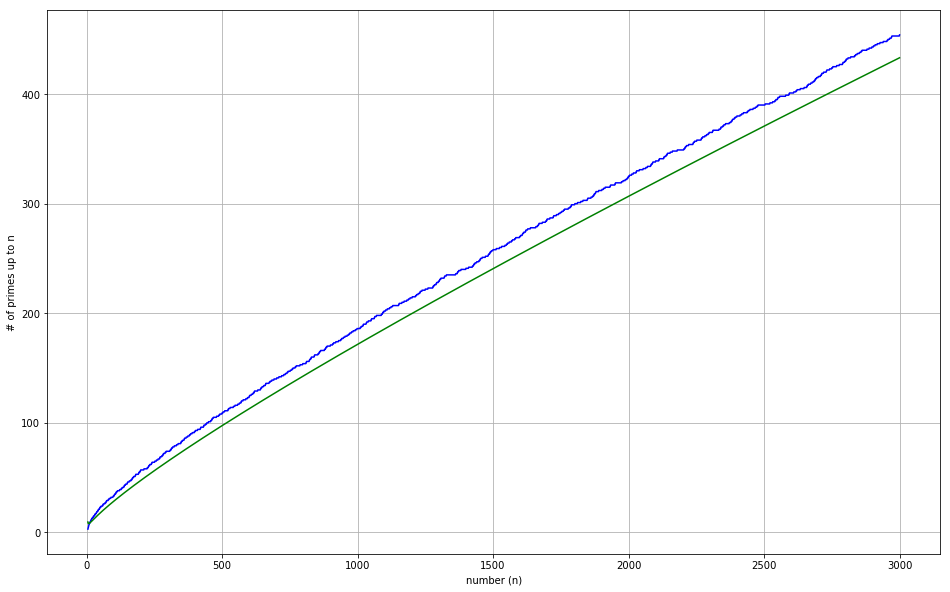

In [7]:
# Make the plot
plt.figure(figsize=(16,10))

ax = plt.subplot()
ax.grid()
ax.set(xlabel='number (n)', ylabel='# of primes up to n')

plt.plot(bp_n, bp_p, color="blue")
plt.plot(bp_n, bp_y, color='green')
plt.show()

## メルセンヌ素数

まずは素数判定関数を少し変更

In [8]:
import math
from decimal import *
getcontext()

Context(prec=28, rounding=ROUND_HALF_EVEN, Emin=-999999, Emax=999999, capitals=1, clamp=0, flags=[], traps=[InvalidOperation, DivisionByZero, Overflow])

In [22]:
def find_factor(num):
    getcontext().prec = int(math.log10(num))+2
    for k in range(2, int(math.sqrt(num))+1):
        if Decimal(num)%k == 0:
            return k
            break
    else: return 0
    
def is_prime(num):
    return find_factor(num)==0

In [23]:
from tqdm import tqdm_notebook as tqdm

Num = 60
plist = [n for n in tqdm(range(2,Num+1)) if is_prime(n)]
print(plist)

[2, 3, 5, 7, 11, 13, 17, 19, 23, 29, 31, 37, 41, 43, 47, 53, 59]


In [28]:
for k in tqdm(plist):
    fac = find_factor(2**k-1)
    if fac == 0:
        print('$2^{}-1 = ${} is prime'.format(k, 2**k-1))
    else:
        print('2^{}-1 = {} factors into {}*{}'.format(k, 2**k-1, fac, int((2**k-1)/fac)))

$2^2-1 = $3 is prime
$2^3-1 = $7 is prime
$2^5-1 = $31 is prime
$2^7-1 = $127 is prime
2^11-1 = 2047 factors into 23*89
$2^13-1 = $8191 is prime
$2^17-1 = $131071 is prime
$2^19-1 = $524287 is prime
2^23-1 = 8388607 factors into 47*178481
2^29-1 = 536870911 factors into 233*2304167
$2^31-1 = $2147483647 is prime
2^37-1 = 137438953471 factors into 223*616318177
2^41-1 = 2199023255551 factors into 13367*164511353
2^43-1 = 8796093022207 factors into 431*20408568497
2^47-1 = 140737488355327 factors into 2351*59862819377
2^53-1 = 9007199254740991 factors into 6361*1416003655831
2^59-1 = 576460752303423487 factors into 179951*3203431780337


In [27]:
fac = find_factor(2**61-1); print(fac)

KeyboardInterrupt: 